# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

# Loading data

In [4]:
cement_data=pd.read_csv("cement_slump.csv")
print(cement_data)

       Cement      Slag   Fly ash     Water       SP  Coarse Aggr.  \
0   273.00000  82.00000 105.00000 210.00000  9.00000     904.00000   
1   163.00000 149.00000 191.00000 180.00000 12.00000     843.00000   
2   162.00000 148.00000 191.00000 179.00000 16.00000     840.00000   
3   162.00000 148.00000 190.00000 179.00000 19.00000     838.00000   
4   154.00000 112.00000 144.00000 220.00000 10.00000     923.00000   
..        ...       ...       ...       ...      ...           ...   
98  248.30000 101.00000 239.10000 168.90000  7.70000     954.20000   
99  248.00000 101.00000 239.90000 169.10000  7.70000     949.90000   
100 258.80000  88.00000 239.60000 175.30000  7.60000     938.90000   
101 297.10000  40.90000 239.90000 194.00000  7.50000     908.90000   
102 348.70000   0.10000 223.10000 208.50000  9.60000     786.20000   

     Fine Aggr.  SLUMP(cm)  FLOW(cm)  Compressive Strength (28-day)(Mpa)  
0     680.00000   23.00000  62.00000                            34.99000  
1     746

# EDA and Graphical analysis

In [4]:
cement_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [5]:
cement_data.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000
mean,229.89417,77.97379,149.01456,197.16796,8.53981,883.97864,739.60485,18.04854,49.61068,36.03874
std,78.87723,60.46136,85.41808,20.20816,2.80753,88.39139,63.34212,8.75084,17.56861,7.83712
min,137.00000,0.00000,0.00000,160.00000,4.40000,708.00000,640.60000,0.00000,20.00000,17.19000
25%,152.00000,0.05000,115.50000,180.00000,6.00000,819.50000,684.50000,14.50000,38.50000,30.90000
50%,248.00000,100.00000,164.00000,196.00000,8.00000,879.00000,742.70000,21.50000,54.00000,35.52000
75%,303.90000,125.00000,235.95000,209.50000,10.00000,952.80000,788.00000,24.00000,63.75000,41.20500
max,374.00000,193.00000,260.00000,240.00000,19.00000,1049.90000,902.00000,29.00000,78.00000,58.53000


<Axes: ylabel='SLUMP(cm)'>

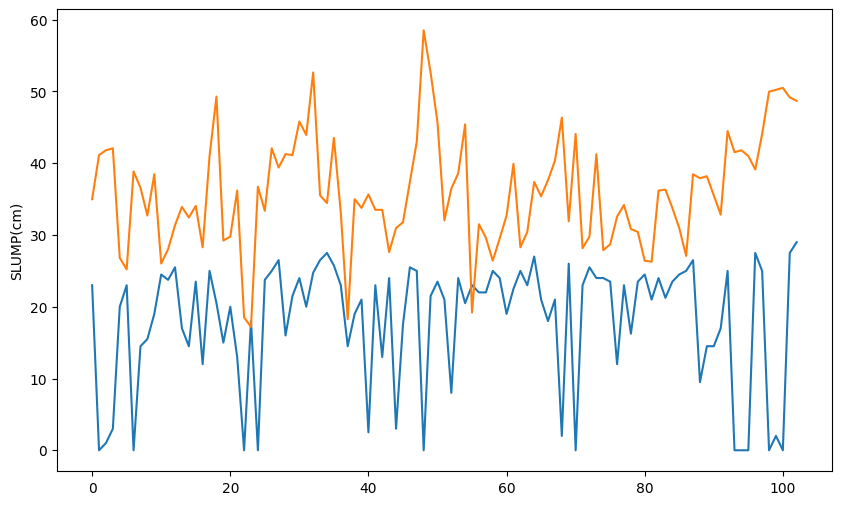

In [6]:
sns.lineplot(cement_data["SLUMP(cm)"])
#sns.lineplot(cement_data["FLOW(cm)"])
sns.lineplot(cement_data["Compressive Strength (28-day)(Mpa)"])

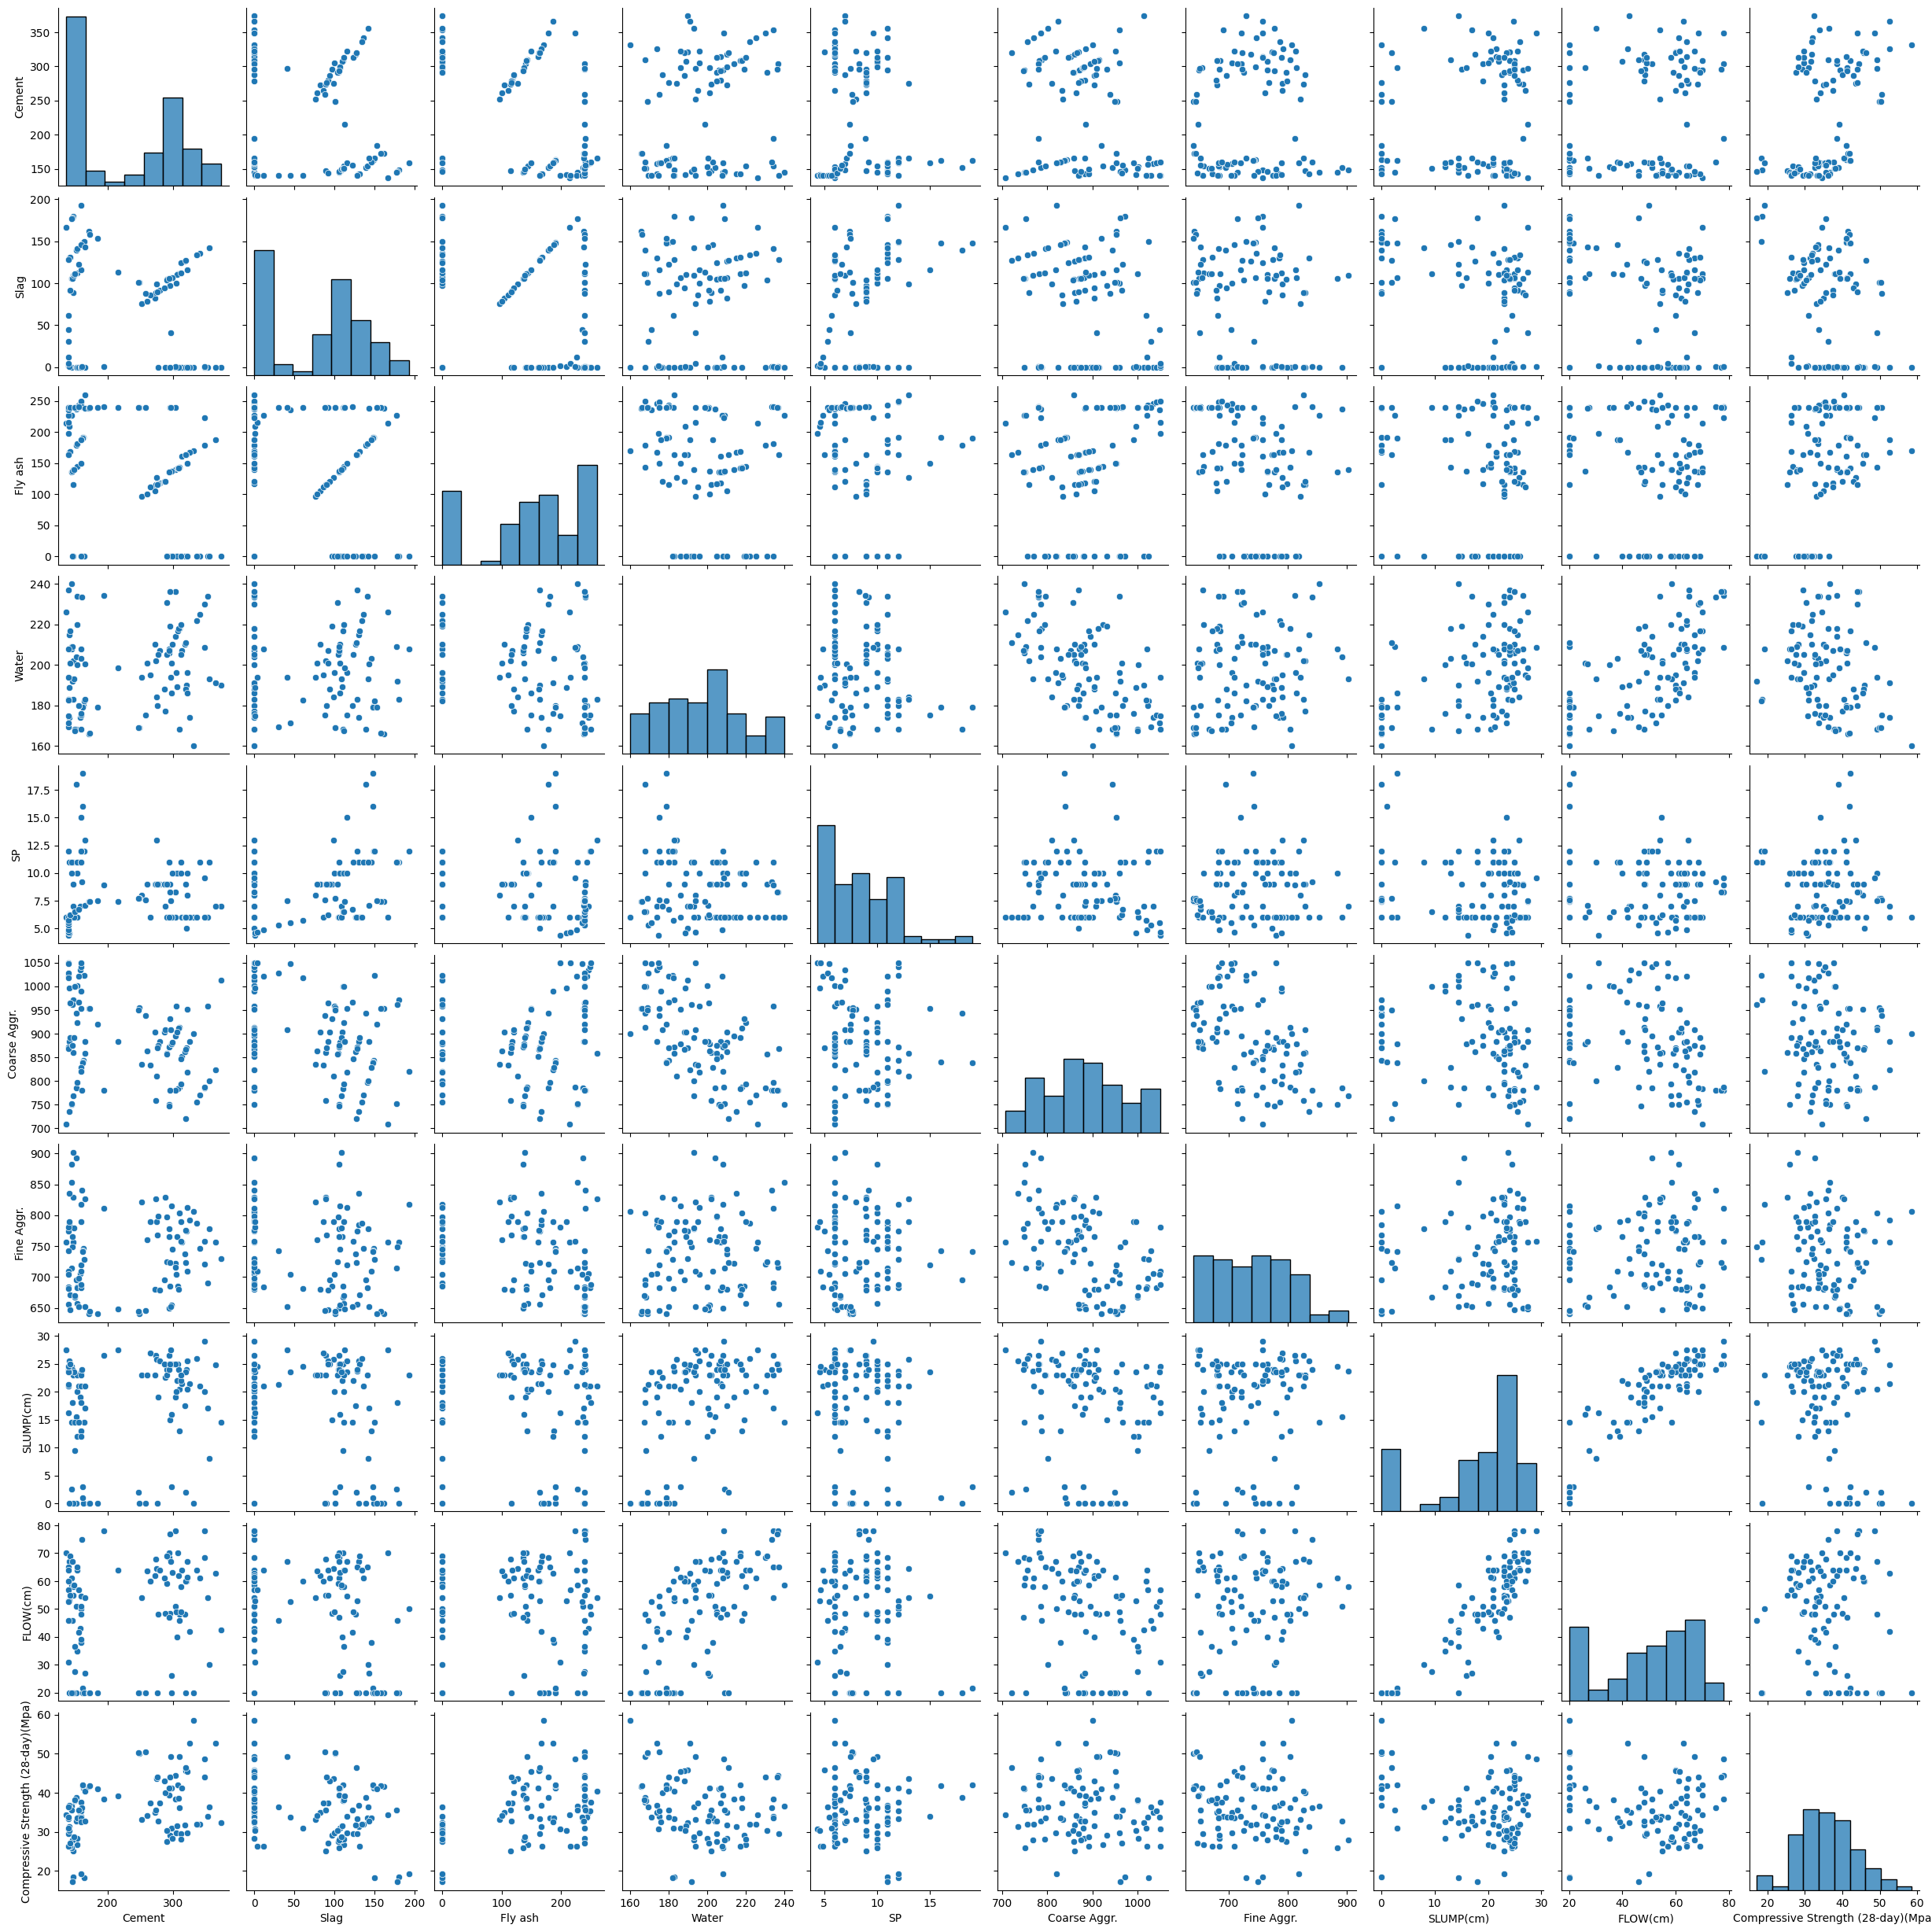

In [10]:
sns.pairplot(cement_data)

<Axes: >

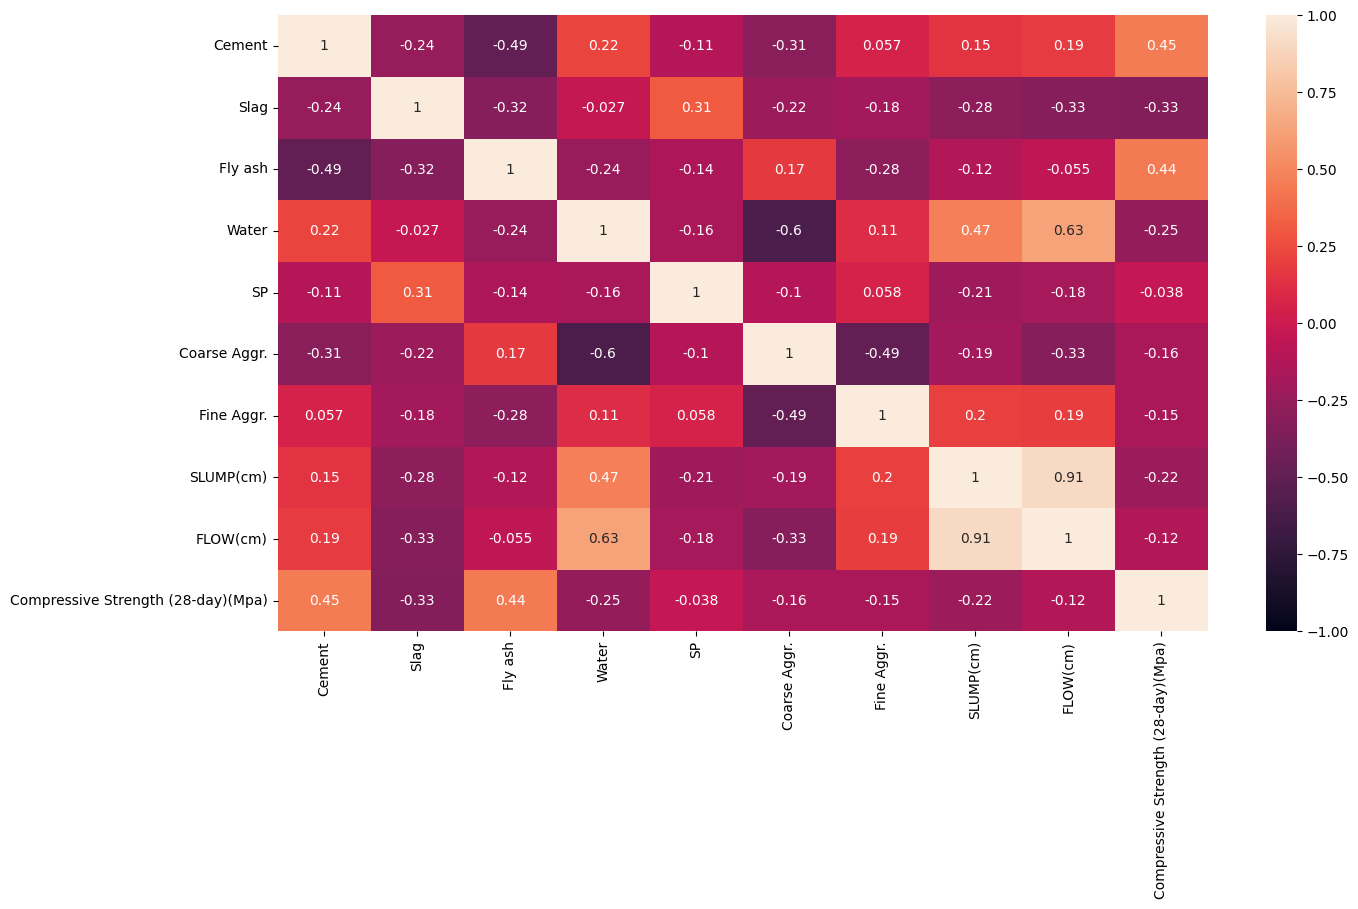

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(cement_data.corr(), annot = True, vmin=-1, vmax=1)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'Cement'),
  Text(2, 0, 'Slag'),
  Text(3, 0, 'Fly ash'),
  Text(4, 0, 'Water'),
  Text(5, 0, 'SP'),
  Text(6, 0, 'Coarse Aggr.'),
  Text(7, 0, 'Fine Aggr.'),
  Text(8, 0, 'SLUMP(cm)'),
  Text(9, 0, 'FLOW(cm)'),
  Text(10, 0, 'Compressive Strength (28-day)(Mpa)')])

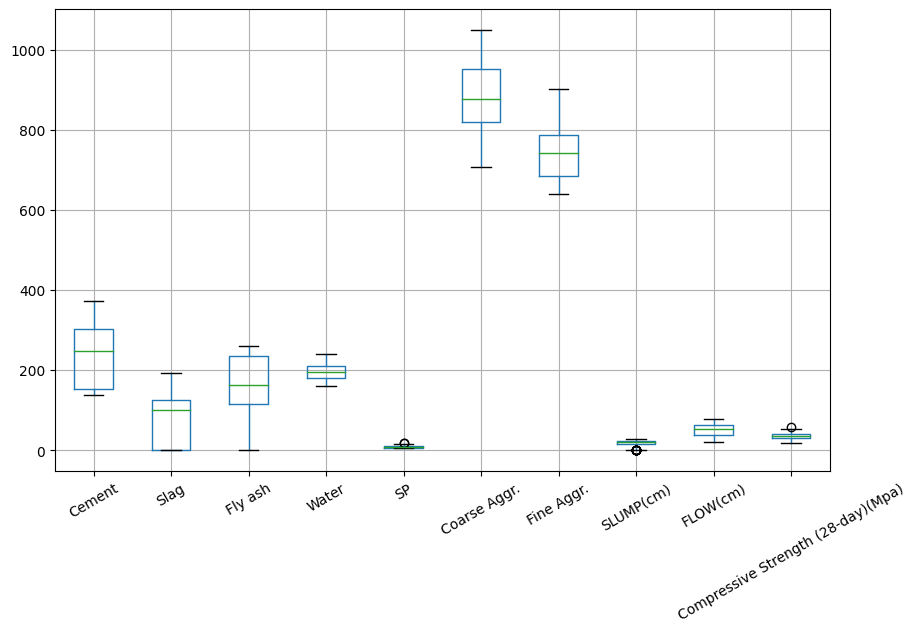

In [12]:
cement_data.boxplot()
plt.xticks(rotation=30)

In [13]:
cement_data.corr()["Compressive Strength (28-day)(Mpa)"]

Cement                                0.44566
Slag                                 -0.33152
Fly ash                               0.44438
Water                                -0.25432
SP                                   -0.03791
Coarse Aggr.                         -0.16061
Fine Aggr.                           -0.15453
SLUMP(cm)                            -0.22350
FLOW(cm)                             -0.12419
Compressive Strength (28-day)(Mpa)    1.00000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

# Data Preprocessing 

### Features and target variable
* Splitting the data into features and target variable

In [5]:
X=cement_data.drop("Compressive Strength (28-day)(Mpa)", axis=1)  #features
y=cement_data["Compressive Strength (28-day)(Mpa)"] #target
X

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
0,273.00000,82.00000,105.00000,210.00000,9.00000,904.00000,680.00000,23.00000,62.00000
1,163.00000,149.00000,191.00000,180.00000,12.00000,843.00000,746.00000,0.00000,20.00000
2,162.00000,148.00000,191.00000,179.00000,16.00000,840.00000,743.00000,1.00000,20.00000
3,162.00000,148.00000,190.00000,179.00000,19.00000,838.00000,741.00000,3.00000,21.50000
4,154.00000,112.00000,144.00000,220.00000,10.00000,923.00000,658.00000,20.00000,64.00000
...,...,...,...,...,...,...,...,...,...
98,248.30000,101.00000,239.10000,168.90000,7.70000,954.20000,640.60000,0.00000,20.00000
99,248.00000,101.00000,239.90000,169.10000,7.70000,949.90000,644.10000,2.00000,20.00000
100,258.80000,88.00000,239.60000,175.30000,7.60000,938.90000,646.00000,0.00000,20.00000
101,297.10000,40.90000,239.90000,194.00000,7.50000,908.90000,651.80000,27.50000,67.00000


### Splitting data into training and testing
* Splitting the data into training and testing sets

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))

82
21


In [17]:
X_train

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
53,309.00000,0.00000,142.00000,218.00000,10.00000,912.00000,680.00000,24.00000,62.00000
22,148.00000,180.00000,0.00000,183.00000,11.00000,972.00000,757.00000,0.00000,20.00000
68,320.00000,127.00000,164.00000,211.00000,6.00000,721.00000,723.00000,2.00000,20.00000
44,298.00000,107.00000,0.00000,186.00000,6.00000,879.00000,815.00000,3.00000,20.00000
98,248.30000,101.00000,239.10000,168.90000,7.70000,954.20000,640.60000,0.00000,20.00000
...,...,...,...,...,...,...,...,...,...
71,313.00000,112.00000,0.00000,220.00000,10.00000,794.00000,789.00000,23.00000,58.00000
14,374.00000,0.00000,0.00000,190.00000,7.00000,1013.00000,730.00000,14.50000,42.50000
92,303.80000,0.20000,239.80000,236.40000,8.30000,780.10000,715.30000,25.00000,78.00000
51,342.00000,136.00000,0.00000,225.00000,11.00000,770.00000,747.00000,21.00000,61.00000


## Scaling


In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [9]:
#will be used in the pipeline later
scaler=StandardScaler()       # mean=0, std=1           #less effected by outliers    
scaler_minmax=MinMaxScaler()  # min-max=[0,1]           #affected by outliers
sclaer_robust=RobustScaler()  # median=0, IQR=1         #more resistant to outliers

In [10]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)  

In [11]:
scaler_minmax.fit(X_train)
X_train_scaledminmax=scaler_minmax.transform(X_train)

In [12]:
sclaer_robust.fit(X_train)
X_train_scaledrobust=sclaer_robust.transform(X_train)

**Difference Between StandardScaler, MinMaxScaler and RobustScaler**

In [13]:
print(pd.DataFrame(X_train).agg(["mean", "std", "max", "min"]).round(3))              # original xtrain data before scaling
print(pd.DataFrame(X_train_scaled).agg(["mean", "std", "max", "min"]).round(3))       # mean=0, std=1 
print(pd.DataFrame(X_train_scaledminmax).agg(["mean", "std", "max", "min"]).round(3)) # min-max=[0,1]   
print(pd.DataFrame(X_train_scaledrobust).agg(["mean", "std", "max", "min"]).round(3)) # median=0, IQR=1 

        Cement      Slag   Fly ash     Water       SP  Coarse Aggr.  \
mean 230.22000  79.01800 145.16600 196.42200  8.54500     888.41500   
std   79.47000  61.28900  88.55500  20.56900  2.92900      88.36500   
max  374.00000 193.00000 250.00000 240.00000 19.00000    1049.90000   
min  137.00000   0.00000   0.00000 160.00000  4.40000     708.00000   

      Fine Aggr.  SLUMP(cm)  FLOW(cm)  
mean   739.01600   17.64000  48.37400  
std     62.55800    9.05400  17.94300  
max    902.00000   29.00000  78.00000  
min    640.60000    0.00000  20.00000  
            0        1        2        3        4        5        6        7  \
mean  0.00000  0.00000  0.00000 -0.00000  0.00000  0.00000  0.00000 -0.00000   
std   1.00600  1.00600  1.00600  1.00600  1.00600  1.00600  1.00600  1.00600   
max   1.82000  1.87100  1.19100  2.13200  3.59200  1.83900  2.62100  1.26200   
min  -1.18000 -1.29700 -1.64900 -1.78200 -1.42400 -2.05400 -1.58300 -1.96000   

            8  
mean -0.00000  
std   1.006

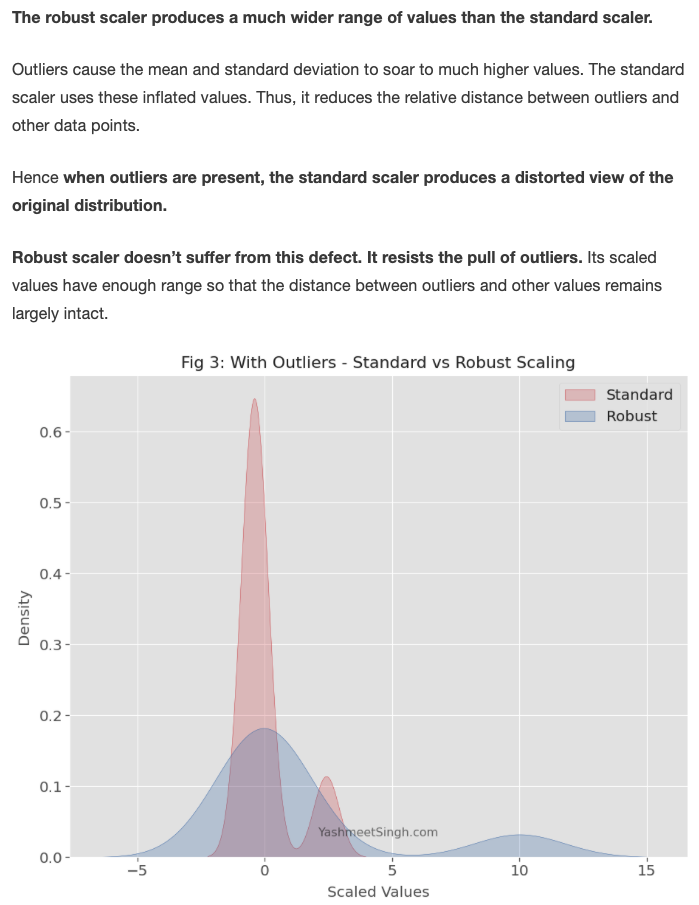

Axes(0.125,0.11;0.168478x0.77)
Axes(0.327174,0.11;0.168478x0.77)
Axes(0.529348,0.11;0.168478x0.77)
Axes(0.731522,0.11;0.168478x0.77)


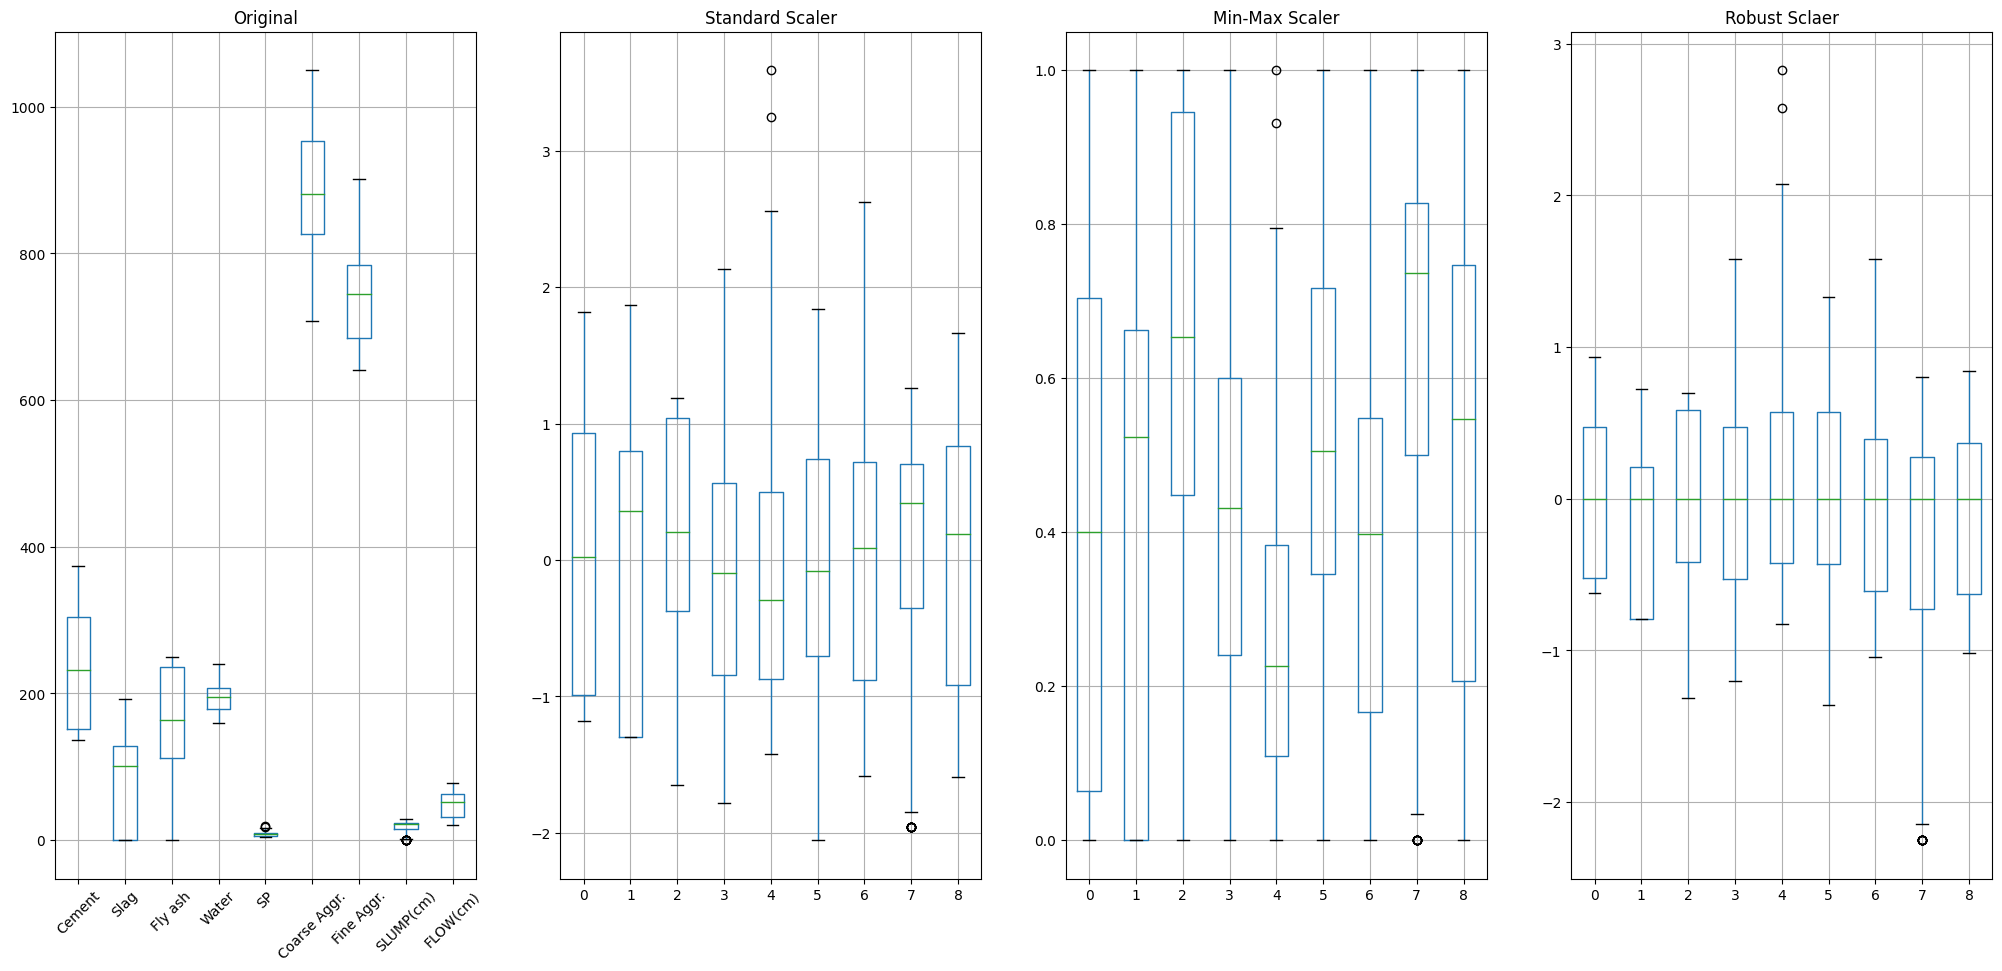

In [25]:
plt.figure(figsize=(25,11))
plt.subplot(1,4,1,)
plt.title("Original")
print((pd.DataFrame(X_train)).boxplot())
plt.xticks(rotation=45)
plt.subplot(1,4,2)
plt.title("Standard Scaler")
print((pd.DataFrame(X_train_scaled)).boxplot()) # mean=0, std=1 
plt.subplot(1,4,3)
plt.title("Min-Max Scaler")
print((pd.DataFrame(X_train_scaledminmax)).boxplot()) #min-max=[0,1]
plt.subplot(1,4,4)
plt.title("Robust Sclaer")
print((pd.DataFrame(X_train_scaledrobust)).boxplot()) #median=0, IQR=1 

##  1. Model Building (Linear Regression)
* Building a linear regression model, fit the model, and make predictions on the test and train set, and compare them.

In [28]:
# model building with pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
pipe_lm = Pipeline([('scaler', scaler), ('lm',lm)])
# pipe_lm_minmax=Pipeline([('scaler', scaler_minmax), ('lm',lm)])
# pipe_lm_robust=Pipeline([('scaler', sclaer_robust), ('lm',lm)])

In [29]:
pipe_lm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

In [30]:
y_pred = pipe_lm.predict(X_test)
y_train_pred = pipe_lm.predict(X_train) 

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [32]:
ls = train_val (y_train, y_train_pred, y_test, y_pred, 'linear')
print(ls)

      linear_train  linear_test
R2         0.90714      0.91197
mae        1.93626      1.74038
mse        5.87431      4.45424
rmse       2.42370      2.11051


In [33]:
# pipe_lm_minmax.fit(X_train, y_train)


In [34]:
# y_pred_minmax = pipe_lm_minmax.predict(X_test)
# y_train_pred_minmax = pipe_lm_minmax.predict(X_train) 


In [35]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# def train_val (y_train, y_train_pred_minmax, y_test, y_pred_minmax, model_name):
#   scores = {model_name+'_trainminmax':{'R2': r2_score(y_train,y_train_pred_minmax),
#                                  'mae': mean_absolute_error(y_train, y_train_pred_minmax),
#                                  'mse': mean_squared_error(y_train, y_train_pred_minmax),
#                                  'rmse': np.sqrt(mean_squared_error(y_train, y_train_pred_minmax))},
#             model_name+'_testminmax':{'R2': r2_score(y_test,y_pred_minmax),
#                                  'mae': mean_absolute_error(y_test,y_pred_minmax),
#                                  'mse': mean_squared_error(y_test,y_pred_minmax),
#                                  'rmse': np.sqrt(mean_squared_error(y_test,y_pred_minmax))}}
#   return pd.DataFrame(scores)

In [36]:
# lsminmax = train_val (y_train, y_train_pred_minmax, y_test, y_pred_minmax, 'linear')
# print(lsminmax)

In [37]:
# pipe_lm_robust.fit(X_train, y_train)

In [38]:
# y_pred_robust = pipe_lm_robust.predict(X_test)
# y_train_pred_robust = pipe_lm_robust.predict(X_train) 

In [39]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# def train_val (y_train, y_train_pred_robust, y_test, y_pred_robust, model_name):
#   scores = {model_name+'_trainrobust':{'R2': r2_score(y_train,y_train_pred_robust),
#                                  'mae': mean_absolute_error(y_train, y_train_pred_robust),
#                                  'mse': mean_squared_error(y_train, y_train_pred_robust),
#                                  'rmse': np.sqrt(mean_squared_error(y_train, y_train_pred_robust))},
#             model_name+'_testrobust':{'R2': r2_score(y_test,y_pred_robust),
#                                  'mae': mean_absolute_error(y_test,y_pred_robust),
#                                  'mse': mean_squared_error(y_test,y_pred_robust),
#                                  'rmse': np.sqrt(mean_squared_error(y_test,y_pred_robust))}}
#   return pd.DataFrame(scores)

In [40]:
# lsrobust = train_val (y_train, y_train_pred_robust, y_test, y_pred_robust, 'linear')
# print(lsrobust)

In [41]:
# pd.concat([ls,lsminmax, lsrobust], axis=1)

![title](Screenshot%202023-02-24%20at%2010.44.40.png)

The 3 scale method (standard, min-max and robust) tested and no difference found between them. So the further operations will be based on the standard scaled data. The reason for the indifference between these scaling methods should be balanced data. There were insignificant/no outliers so scaling methods worked the same.!!!!(check this later)



**CROSS** **VALIDATION**

In [42]:
from sklearn.model_selection import cross_validate, cross_val_score

In [43]:
model = Pipeline([("scaler", scaler), ("lm", lm)])
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [44]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.00279,0.00105,0.94221,-1.90852,-4.64519,-2.15527
2,0.00182,0.00082,0.70663,-2.64732,-10.75666,-3.27973
3,0.00135,0.00072,0.86593,-1.48283,-3.72576,-1.93022
4,0.00127,0.00071,0.92317,-2.24411,-8.43401,-2.90414
5,0.00125,0.00071,0.79289,-2.86791,-11.69826,-3.42027


In [45]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.84617
test_neg_mean_absolute_error       -2.23014
test_neg_mean_squared_error        -7.85198
test_neg_root_mean_squared_error   -2.73793
dtype: float64

In [46]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.90714,0.91197
mae,1.93626,1.74038
mse,5.87431,4.45424
rmse,2.42370,2.11051


In [47]:
print("train RMSE:", 2.42370/cement_data["Compressive Strength (28-day)(Mpa)"].mean())
print("CV RMSE:", 2.73793/cement_data["Compressive Strength (28-day)(Mpa)"].mean())

train RMSE: 0.06725263268489409
CV RMSE: 0.07597186145436814


### Interpret the model
* Interpret the model by looking at the coefficients

In [48]:
pipe_lm["lm"].coef_

array([ 4.28015177, -2.22287954,  3.9320198 , -4.77083923,  0.12109966,
       -5.27729122, -2.61131342, -2.18837804,  1.46570621])

In [49]:
lm_df = pd.DataFrame(pipe_lm["lm"].coef_, columns = ["lm_coef"], index=cement_data.columns[:-1])
lm_df

,lm_coef
Cement,4.28015
Slag,-2.22288
Fly ash,3.93202
Water,-4.77084
SP,0.12110
Coarse Aggr.,-5.27729
Fine Aggr.,-2.61131
SLUMP(cm),-2.18838
FLOW(cm),1.46571


# 2. Regularization
* Regularize the model by adding a regularization term to the loss function.

## 2.1 Ridge (Apply and evaluate)
* Build a Ridge regression model, fit the model, and make predictions on the test and train set, and compare them.


In [50]:
from sklearn.linear_model import Ridge

ridge_model = Ridge (alpha=1, random_state=42)
pipe_ridge = Pipeline ([('scaler', scaler), ('ridge', ridge_model)])
pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=1, random_state=42))])

In [51]:
y_pred = pipe_ridge.predict(X_test)
y_train_pred = pipe_ridge.predict(X_train)

In [52]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, 'ridge')
rs

,ridge_train,ridge_test
R2,0.90639,0.91120
mae,1.93810,1.73247
mse,5.92197,4.49282
rmse,2.43351,2.11963


In [53]:
pd.concat([ls,rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.90714,0.91197,0.90639,0.91120
mae,1.93626,1.74038,1.93810,1.73247
mse,5.87431,4.45424,5.92197,4.49282
rmse,2.42370,2.11051,2.43351,2.11963


**RIDGE CV ALPHA=1**

In [54]:
model = Pipeline([('scaler', scaler), ('ridge', ridge_model)])
scores = cross_validate(model, X_train, y_train, scoring= ['r2','neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [55]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.00194,0.00089,0.94501,-1.83715,-4.41991,-2.10236
2,0.00151,0.00091,0.70868,-2.65149,-10.68143,-3.26825
3,0.00135,0.00078,0.87058,-1.48780,-3.59666,-1.89649
4,0.00157,0.00098,0.92064,-2.25578,-8.71081,-2.95141
5,0.00123,0.00072,0.80468,-2.79330,-11.03252,-3.32152


In [56]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.84992
test_neg_mean_absolute_error       -2.20510
test_neg_mean_squared_error        -7.68827
test_neg_root_mean_squared_error   -2.70800
dtype: float64

In [57]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.90639,0.91120
mae,1.93810,1.73247
mse,5.92197,4.49282
rmse,2.43351,2.11963


In [58]:
pipe_ridge["ridge"].coef_

array([ 5.01092233, -1.37765187,  4.8062743 , -3.90644878,  0.26138511,
       -4.06644253, -1.74660531, -1.95498663,  1.13349998])

In [59]:
rm_df = pd.DataFrame(pipe_ridge["ridge"].coef_, columns = ["ridge_coef_1"], index=cement_data.columns[:-1])

In [60]:
pd.concat([lm_df,rm_df], axis = 1) 

,lm_coef,ridge_coef_1
Cement,4.28015,5.01092
Slag,-2.22288,-1.37765
Fly ash,3.93202,4.80627
Water,-4.77084,-3.90645
SP,0.12110,0.26139
Coarse Aggr.,-5.27729,-4.06644
Fine Aggr.,-2.61131,-1.74661
SLUMP(cm),-2.18838,-1.95499
FLOW(cm),1.46571,1.13350


## Choosing best alpha value with Cross-Validation

In [61]:
from sklearn.linear_model import RidgeCV

In [62]:
alpha_space = np.linspace(0.1, 1, 100)
alpha_space

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [63]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 10, scoring= "neg_root_mean_squared_error") # will be used in pipeline later

In [64]:
pipe_ridgecv = Pipeline([("scaler", scaler), ("ridgecv", ridge_cv_model)]) # pipeline is used to combine scaler and model

In [65]:
pipe_ridgecv.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.336363...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         cv=10, scoring='neg_root_mean_squared_error'))])

In [66]:
pipe_ridgecv["ridgecv"].alpha_

0.9181818181818181

In [67]:
# Ridge( alpha = 0.91)
y_pred = pipe_ridgecv.predict(X_test)
y_train_pred = pipe_ridgecv.predict(X_train)  

In [68]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv") 
rcs

,ridge_cv_train,ridge_cv_test
R2,0.90648,0.91135
mae,1.93777,1.73241
mse,5.91664,4.48519
rmse,2.43241,2.11783


In [69]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.90714,0.91197,0.90639,0.91120,0.90648,0.91135
mae,1.93626,1.74038,1.93810,1.73247,1.93777,1.73241
mse,5.87431,4.45424,5.92197,4.49282,5.91664,4.48519
rmse,2.42370,2.11051,2.43351,2.11963,2.43241,2.11783


In [70]:
pipe_ridgecv["ridgecv"].coef_

array([ 5.00521265, -1.38945391,  4.79652108, -3.93170693,  0.25805802,
       -4.09232266, -1.76329842, -1.96996865,  1.15500214])

In [71]:
rcm_df = pd.DataFrame(pipe_ridgecv["ridgecv"].coef_, columns=["ridge_cv_coef_0.91"], index=cement_data.columns[:-1])

In [72]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1) 

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91
Cement,4.28015,5.01092,5.00521
Slag,-2.22288,-1.37765,-1.38945
Fly ash,3.93202,4.80627,4.79652
Water,-4.77084,-3.90645,-3.93171
SP,0.12110,0.26139,0.25806
Coarse Aggr.,-5.27729,-4.06644,-4.09232
Fine Aggr.,-2.61131,-1.74661,-1.76330
SLUMP(cm),-2.18838,-1.95499,-1.96997
FLOW(cm),1.46571,1.13350,1.15500


## 2.2 Lasso (Apply and evalute)

In [73]:
from sklearn.linear_model import Lasso, LassoCV

lasso_model = Lasso(alpha=1, random_state=42)
pipe_lasso = Pipeline([("scaler", scaler), ("lasso", lasso_model)])
pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=1, random_state=42))])

In [74]:
y_pred = pipe_lasso.predict(X_test)
y_train_pred = pipe_lasso.predict(X_train)

In [75]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso") 

lss

,lasso_train,lasso_test
R2,0.77643,0.80164
mae,2.95962,2.46601
mse,14.14406,10.03638
rmse,3.76086,3.16803


In [76]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.90714,0.91197,0.90639,0.91120,0.90648,0.91135,0.77643,0.80164
mae,1.93626,1.74038,1.93810,1.73247,1.93777,1.73241,2.95962,2.46601
mse,5.87431,4.45424,5.92197,4.49282,5.91664,4.48519,14.14406,10.03638
rmse,2.42370,2.11051,2.43351,2.11963,2.43241,2.11783,3.76086,3.16803


**LASSO CV ALPHA=1**

In [77]:
model = Pipeline([("scaler", scaler), ("lasso", lasso_model)])
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [78]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.00258,0.00098,0.82628,-3.15423,-13.96279,-3.73668
2,0.00157,0.00076,0.49966,-3.38782,-18.34544,-4.28316
3,0.00131,0.00069,0.67632,-2.38206,-8.99529,-2.99921
4,0.00120,0.00070,0.68164,-4.37294,-34.94594,-5.91151
5,0.00120,0.00068,0.73609,-3.24446,-14.90637,-3.86088


In [79]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                              0.68400
test_neg_mean_absolute_error        -3.30830
test_neg_mean_squared_error        -18.23117
test_neg_root_mean_squared_error    -4.15829
dtype: float64

In [80]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.77643,0.80164
mae,2.95962,2.46601
mse,14.14406,10.03638
rmse,3.76086,3.16803


In [81]:
model["lasso"].coef_

array([ 4.82131411, -0.        ,  4.88005283, -0.81976891,  0.        ,
       -0.35149513, -0.        , -0.71063068, -0.        ])

In [82]:
lsm_df = pd.DataFrame(model["lasso"].coef_, columns = ["lasso_coef_1"],index=cement_data.columns[:-1])

In [83]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1) 

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91,lasso_coef_1
Cement,4.28015,5.01092,5.00521,4.82131
Slag,-2.22288,-1.37765,-1.38945,-0.00000
Fly ash,3.93202,4.80627,4.79652,4.88005
Water,-4.77084,-3.90645,-3.93171,-0.81977
SP,0.12110,0.26139,0.25806,0.00000
Coarse Aggr.,-5.27729,-4.06644,-4.09232,-0.35150
Fine Aggr.,-2.61131,-1.74661,-1.76330,-0.00000
SLUMP(cm),-2.18838,-1.95499,-1.96997,-0.71063
FLOW(cm),1.46571,1.13350,1.15500,-0.00000


### Choosing best alpha value with Cross-Validation

In [84]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter=100000, random_state=42)
pipe_lassocv = Pipeline([("scaler", scaler), ("lassocv", lasso_cv_model)])

In [85]:
pipe_lassocv.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lassocv',
                 LassoCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.336363...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         cv=10, max_iter=100000, random_state=42))])

In [86]:
pipe_lassocv["lassocv"].alpha_

0.1

In [87]:
y_pred = pipe_lassocv.predict(X_test)   
y_train_pred = pipe_lassocv.predict(X_train)

In [88]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.90049,0.90794
mae,1.96675,1.76672
mse,6.29529,4.65776
rmse,2.50904,2.15818


In [89]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.90714,0.91197,0.90639,0.91120,0.90648,0.91135,0.77643,0.80164,0.90049,0.90794
mae,1.93626,1.74038,1.93810,1.73247,1.93777,1.73241,2.95962,2.46601,1.96675,1.76672
mse,5.87431,4.45424,5.92197,4.49282,5.91664,4.48519,14.14406,10.03638,6.29529,4.65776
rmse,2.42370,2.11051,2.43351,2.11963,2.43241,2.11783,3.76086,3.16803,2.50904,2.15818


In [90]:
pipe_lassocv["lassocv"].coef_

array([ 6.36058116,  0.        ,  6.44860782, -2.38557078,  0.46733827,
       -2.09003844, -0.22823288, -1.08177398,  0.        ])

In [91]:
lcm_df = pd.DataFrame(pipe_lassocv["lassocv"].coef_, columns = ["lasso_cv_coef_0.1"], index=cement_data.columns[:-1])

In [92]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91,lasso_coef_1,lasso_cv_coef_0.1
Cement,4.28015,5.01092,5.00521,4.82131,6.36058
Slag,-2.22288,-1.37765,-1.38945,-0.00000,0.00000
Fly ash,3.93202,4.80627,4.79652,4.88005,6.44861
Water,-4.77084,-3.90645,-3.93171,-0.81977,-2.38557
SP,0.12110,0.26139,0.25806,0.00000,0.46734
Coarse Aggr.,-5.27729,-4.06644,-4.09232,-0.35150,-2.09004
Fine Aggr.,-2.61131,-1.74661,-1.76330,-0.00000,-0.22823
SLUMP(cm),-2.18838,-1.95499,-1.96997,-0.71063,-1.08177
FLOW(cm),1.46571,1.13350,1.15500,-0.00000,0.00000


Lasso eliminated one of the features that have high-level multicolinerity (SLUMP-FLOW)

## 2.3 Elastic-Net (Apply and evaluate )

In [93]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
pipe_elastic = Pipeline([("scaler", scaler), ("elastic", elastic_model)])

In [94]:
pipe_elastic.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('elastic', ElasticNet(alpha=1, random_state=42))])

In [95]:
y_pred = pipe_elastic.predict(X_test)
y_train_pred = pipe_elastic.predict(X_train)

In [96]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.63673,0.63503
mae,3.80284,3.55595
mse,22.98172,18.46642
rmse,4.79393,4.29726


In [97]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.90714,0.91197,0.90639,0.91120,0.90648,0.91135,0.77643,0.80164,0.90049,0.90794,0.63673,0.63503
mae,1.93626,1.74038,1.93810,1.73247,1.93777,1.73241,2.95962,2.46601,1.96675,1.76672,3.80284,3.55595
mse,5.87431,4.45424,5.92197,4.49282,5.91664,4.48519,14.14406,10.03638,6.29529,4.65776,22.98172,18.46642
rmse,2.42370,2.11051,2.43351,2.11963,2.43241,2.11783,3.76086,3.16803,2.50904,2.15818,4.79393,4.29726


## Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [98]:
model = Pipeline([("scaler", scaler), ("elastic", ElasticNet(alpha=1, l1_ratio=0.5, random_state=42))])

scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [99]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.55942,-4.93367,-35.41272,-5.95086
2,0.46647,-3.31165,-19.56215,-4.42291
3,0.53725,-3.03680,-12.86003,-3.58609
4,0.54085,-5.51795,-50.40104,-7.09937
5,0.62505,-4.11615,-21.17844,-4.60200


In [100]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.54581
test_neg_mean_absolute_error        -4.18324
test_neg_mean_squared_error        -27.88287
test_neg_root_mean_squared_error    -5.13225
dtype: float64

In [101]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.63673,0.63503
mae,3.80284,3.55595
mse,22.98172,18.46642
rmse,4.79393,4.29726


In [102]:
pipe_elastic["elastic"].coef_

array([ 2.61657059, -0.73015253,  2.67139945, -1.20195947,  0.        ,
       -1.16386814, -0.32234008, -0.82569551, -0.        ])

In [103]:
em_df = pd.DataFrame(pipe_elastic["elastic"].coef_, columns=["elastic_coef_(alp:1, L1:0.5)"], index=cement_data.columns[:-1])

In [104]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91,lasso_coef_1,lasso_cv_coef_0.1,"elastic_coef_(alp:1, L1:0.5)"
Cement,4.28015,5.01092,5.00521,4.82131,6.36058,2.61657
Slag,-2.22288,-1.37765,-1.38945,-0.00000,0.00000,-0.73015
Fly ash,3.93202,4.80627,4.79652,4.88005,6.44861,2.67140
Water,-4.77084,-3.90645,-3.93171,-0.81977,-2.38557,-1.20196
SP,0.12110,0.26139,0.25806,0.00000,0.46734,0.00000
Coarse Aggr.,-5.27729,-4.06644,-4.09232,-0.35150,-2.09004,-1.16387
Fine Aggr.,-2.61131,-1.74661,-1.76330,-0.00000,-0.22823,-0.32234
SLUMP(cm),-2.18838,-1.95499,-1.96997,-0.71063,-1.08177,-0.82570
FLOW(cm),1.46571,1.13350,1.15500,-0.00000,0.00000,-0.00000


## Grid Search for ElasticNet

In [105]:
from sklearn.model_selection import GridSearchCV

elastic_model = ElasticNet(max_iter=10000, random_state=42) 
pipe_elastic = Pipeline([("scaler", scaler), ("elastic", elastic_model)])

In [106]:
param_grid = {"elastic__alpha":alpha_space,
            "elastic__l1_ratio":[0.1, 0.5, 0.7,0.9, 0.95, 1]}

In [107]:
grid_model = GridSearchCV(estimator = pipe_elastic, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [108]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elast

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('elastic',
                                        ElasticNet(max_iter=10000,
                                                   random_state=42))]),
             param_grid={'elastic__alpha': array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545,...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         'elastic__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [109]:
grid_model.best_params_

{'elastic__alpha': 0.1, 'elastic__l1_ratio': 1}

In [110]:
y_pred = grid_model.predict(X_test)
y_train_pred = grid_model.predict(X_train)

In [111]:
gm = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_grid")
gm

,elastic_grid_train,elastic_grid_test
R2,0.90049,0.90794
mae,1.96675,1.76672
mse,6.29529,4.65776
rmse,2.50904,2.15818


In [112]:
pd.concat([ls,rs, rcs, lss, lcs, es, gm], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_grid_train,elastic_grid_test
R2,0.90714,0.91197,0.90639,0.91120,0.90648,0.91135,0.77643,0.80164,0.90049,0.90794,0.63673,0.63503,0.90049,0.90794
mae,1.93626,1.74038,1.93810,1.73247,1.93777,1.73241,2.95962,2.46601,1.96675,1.76672,3.80284,3.55595,1.96675,1.76672
mse,5.87431,4.45424,5.92197,4.49282,5.91664,4.48519,14.14406,10.03638,6.29529,4.65776,22.98172,18.46642,6.29529,4.65776
rmse,2.42370,2.11051,2.43351,2.11963,2.43241,2.11783,3.76086,3.16803,2.50904,2.15818,4.79393,4.29726,2.50904,2.15818


Feature importances with Ridge

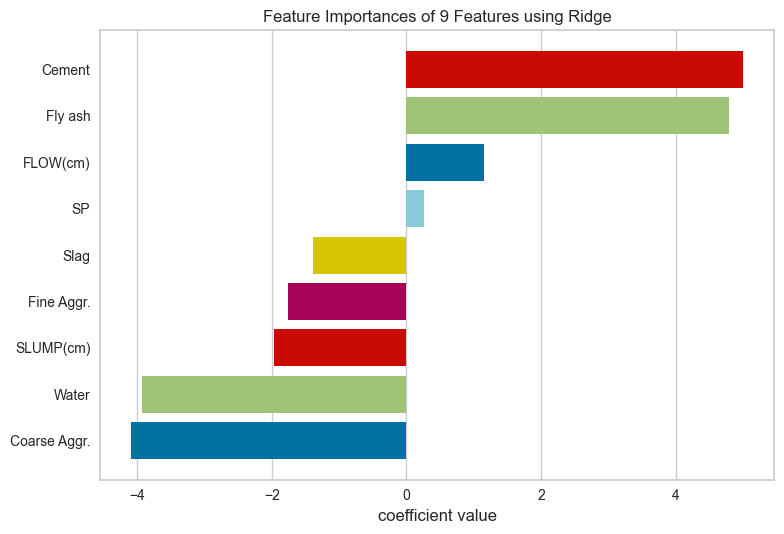

<Axes: title={'center': 'Feature Importances of 9 Features using Ridge'}, xlabel='coefficient value'>

In [113]:
from yellowbrick.model_selection import FeatureImportances 

model = Ridge(alpha=pipe_ridgecv["ridgecv"].alpha_)  # ridge_cv_model.alpha_ = 0.91
viz = FeatureImportances(model,labels=list(X.columns),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show()


Feature importances with Lasso

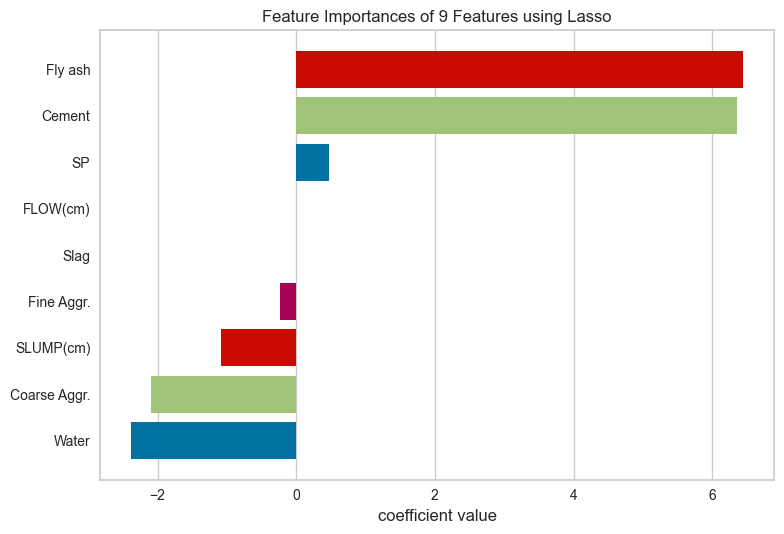

<Axes: title={'center': 'Feature Importances of 9 Features using Lasso'}, xlabel='coefficient value'>

In [114]:
from yellowbrick.model_selection import FeatureImportances

model = Lasso(alpha=pipe_lassocv["lassocv"].alpha_)  # lasso_cv_model.alpha_ = 0.1
viz = FeatureImportances(model,labels=list(X.columns),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show()